# Transformada de Fourier de Tiempo Discreto (DTFT)

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Derivación

Consideremos el caso de una señal discreta $f[n]$, que fue muestreada a partir de una señal continua $f(t)$, cuya Transformada de Fourier continua es $F(u)$, con un período de muestreo $T$. Es decir, construimos $f[n]$ a partir de 

$$ f[n] = f(nT) $$

La señal muestreada $f_s(t)$ es

$$ f_s(t) = f  {\bot \!\! \bot \!\! \bot}_T = \sum_{n=-\infty}^{\infty}  f \mathbf{\delta_{nT}} = \sum_{n=-\infty}^{\infty}  f(nT) \mathbf{\delta_{nT}} $$

Ahora, podemos tomar la Transformada de Fourier de esta función muestreada

$$ \mathcal{F}\{f_s\}(u) = \mathcal{F}\{\sum_{n=-\infty}^{\infty}  f(nT) \mathbf{\delta_{nT}}\} = \sum_{n=-\infty}^{\infty}  f(nT) \mathcal{F}\{\mathbf{\delta_{nT}}\} = \sum_{n=-\infty}^{\infty}  f(nT) e^{-i 2\pi u nT}  $$

Otra forma de calcular este resultado es la siguiente: 

$$ \mathcal{F}\{f_s\}(u) = \mathcal{F}\{ f  {\bot \!\! \bot \!\! \bot}_T \} = F \ast \frac{1}{T} {\bot \!\! \bot \!\! \bot}_{\frac{1}{T}} = \frac{1}{T} \sum_{n=-\infty}^{\infty} F(u - \frac{n}{T}) $$

Con lo que concluímos que: 

$$ \tilde{F}(u) = \mathcal{F}\{f_s\}(u) = \frac{1}{T} \sum_{n=-\infty}^{\infty} F(u - \frac{n}{T}) =  \sum_{n=-\infty}^{\infty}  f(nT) e^{-i 2\pi u nT}  $$

Esta igualdad también se puede obtener de la [fórmula de la suma de Poisson](A1-Fundamentos_matematicos.ipynb#formula_suma_Poisson). Observamos que el resultado es una función periódica, construída a partir de réplicas desplazadas del espectro original $F(u)$, que denotaremos $\tilde{F}(u)$, para recalcar su naturaleza periódica. A partir de esta derivación, podemos definir la DTFT.

## Definición

La [transformada de Fourier de tiempo discreto](https://en.wikipedia.org/wiki/Discrete-time_Fourier_transform) (DTFT) de una señal discreta $f[n]$ se define como

\begin{equation}
\boxed{\text{DTFT}\{f\}(u) = \tilde{F}(u) = \sum_{n = -\infty}^{\infty} f[n] \, e^{-i 2 \pi u n T}}  
\end{equation}

donde $uT \in \mathbb{R}$ denota una frecuencia normalizada, al estar multiplicada por el período de muestreo, es decir, está dividida por la frecuencia de muestreo. El DTFT mapea una señal discreta $f[n]$ con $n \in \mathbb{Z}$ hacia un espectro continuo periódico $\tilde{F}(u) = \mathcal{F}\{ f[n] \}$ con $u \in \mathbb{R}$. 

Una condición suficiente pero no necesaria para la existencia de la DTFT es

\begin{equation}
\left|\tilde{F}(u)\right| = \left| \sum_{n = -\infty}^{\infty} f[n] \, e^{-i 2 \pi u n T} \right| 
\leq \sum_{k = -\infty}^{\infty} \left| f[n] \right| < \infty
\end{equation}

donde el límite superior resulta de la [desigualdad triangular](https://en.wikipedia.org/wiki/Triangle_inequality). Como condición suficiente para la existencia de la DTFT, se deduce que una señal $f[n]$ debe ser absolutamente sumable.

<div class="alert alert-block alert-info">
La DTFT es periódica de período de $\frac{1}{T}$,

\begin{equation}
\tilde{F}(u) = \tilde{F}\left(u + \frac{n}{T}\right)
\end{equation}

para $n \in \mathbb{Z}$. Por lo tanto, es suficiente considerar la DTFT en un solo período. Por lo general, se elige el intervalo $-\frac{1}{2T} < u < \frac{1}{2T}$. 
</div>

***
## DTFT inversa
Hemos visto que la información sobre la señal discreta $f[n]$ está contenida en un solo período de su Transformada de Fourier. 

Podemos derivar la DTFT inversa utilizando la Transformada de Fourier inversa:

$$ f(t) = \mathcal{F}^{-1}\{F\}(t) = \int_{\mathbb{R}} F(u) e^{i 2 \pi u t} du $$


Suponiendo que $F(u)$ es de ancho de banda limitado:

$$ F(u) = 0, \; |u| > \frac{1}{2T} $$

entonces no hay traslape entre las réplicas en el espectro. En este caso podemos reconstruir la señal original mediante la integración en un sólo período, es decir

$$ f(t) = \mathcal{F}^{-1}\{\tilde{F}\}(t) = \int_{\frac{-1}{2T}}^{\frac{1}{2T}} \tilde{F}(u) e^{i 2 \pi u t} du $$

Recordando que la señal que queremos reconstruir es una señal discreta, es decir

$$ f[n] = f(nT) $$

y además, considerando que cuando la señal es muestreada las réplicas quedan escaladas por $T$, podemos definir la transformada de Fourier inversa de tiempo discreto como:

\begin{equation}
\boxed{\text{IDTFT}\{\tilde{F}\}[n] = f[n] = T \int_{\frac{-1}{2T}}^{\frac{1}{2T}} \tilde{F}(u) \, e^{i 2 \pi u n T} \; du =  T \int_{0}^{\frac{1}{T}} \tilde{F}(u) \, e^{i 2 \pi u n T} \; du }
\end{equation}

***
### DTFT del impulso de Dirac

La DTFT del [impulso de Dirac discreto o Delta de Kronecker](./26-Funciones_importantes_discretas.ipynb#impulso) se obtiene al introducir $\delta[n]$ en la definición de la DTFT y utilizar la propiedad del cedazo del impulso, es decir:

\begin{equation}
\mathcal{F}\{ \delta[n] \} = \sum_{n = -\infty}^{\infty} \delta[n] \, e^{-i 2 \pi u n T} = 1
\end{equation}

Vemos que la DTFT del impulso de Dirac es igual a uno. Por lo tanto, todas las frecuencias normalizadas $u T$ están presentes con el mismo peso. Esta es una propiedad importante en la teoría de señales y sistemas discretos, ya que el impulso de Dirac se utiliza para caracterizar los sistemas lineales invariantes en el tiempo (LTI) por su [respuesta al impulso](./29-Sistemas_LTI_discretos.ipynb#respuesta_al_impulso) $h[n] = \mathcal{L} \{ \delta[n] \}$.

**Ejercicio**

* Derive la DTFT de un impulso de Dirac desplazado $\delta[n - \kappa]$.

***
### DTFT  de un rect discreto

La DTFT $\tilde{F}(u) = \mathcal{F}\{ \sqcap_L[n] \}$ de un [rect discreto de largo L](./26-Funciones_importantes_discretas.ipynb#rect) se puede determinar al introducir su definición en la definición de la DTFT. Para estudiar el caso genérico, consideremos que el rect tiene período de muestreo T. Entonces, y utilizando el resultado de una [serie geométrica finita](https://en.wikipedia.org/wiki/Geometric_series):

\begin{equation}
\mathcal{F} \{ \sqcap_L[n] \} = \sum_{n = -\infty}^{\infty} \sqcap_L[n] \, e^{-i 2 \pi u n T} =
\sum_{n = 0}^{L-1} e^{- i 2 \pi u n T} = \frac{1 - e^{-i 2 \pi u L T}}{1 - e^{-i 2 \pi u T}} =  e^{-i 2 \pi T \frac{L-1}{2}} \cdot \frac{\sin \left(\frac{L 2 \pi u T}{2} \right)}{\sin \left( \frac{2 \pi u T}{2} \right) } = e^{-i 2 \pi T \frac{L-1}{2}} L \; \text{asinc}_{LT}(u)
\end{equation}

donde vemos que el resultado es una función sinc aliada, también llamada [función de Dirichlet o asinc](./03-Funciones_importantes.ipynb#dirichlet) con factor $LT$. Además, esta función está multiplicada por una exponencial compleja, lo que implica que ha sido desfasada en el dominio de las muestras.

**Ejemplo**

La DTFT de la señal rectangular se calcula para un $L$ de longitud específica mediante la evaluación de las series finitas anteriores usando `SymPy`.

In [7]:
%matplotlib inline
import sympy as sym
sym.init_printing()

u = sym.symbols('u', real=True)
n = sym.symbols('n', integer=True)

L = 5
F = sym.summation(sym.exp(-sym.I*2*sym.pi*u*n), (n, 0, L-1))
F

La magnitud $|\tilde{F}(u)|$ y la fase $\varphi(u) = \arg \{ \tilde{F}(u) \}$ del espectro se grafican a continuación

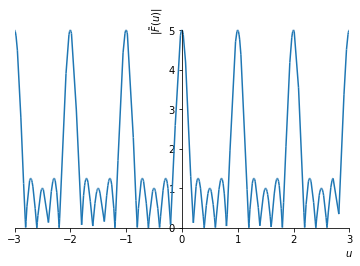

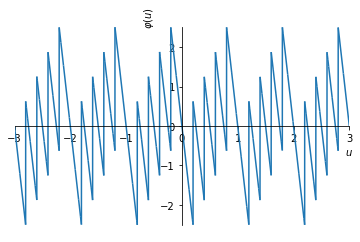

In [9]:
sym.plot(sym.Abs(F), (u, -3, 3), xlabel=r'$u$', ylabel=r'$| \tilde{F}(u) |$')
sym.plot(sym.arg(F), (u, -3, 3), xlabel=r'$u$', ylabel=r'$\varphi(u)$');

**Ejercicio**

* ¿Qué sucede con la magnitud / fase si aumenta / disminuye la longitud $L$ de la señal rectangular?

***

### DTFT de la exponencial compleja

La DTFT de la [señal exponencial armónica discreta](./26-Funciones_importantes_discretas.ipynb#exponencial_compleja) $e^{i 2 \pi u_0 n T}$ con frecuencia normalizada $u_0 T$ se puede obtener mediante la definición de la DTFT. Entonces:

\begin{equation}
\mathcal{\tilde{F}} \{u\} = \sum_{n = -\infty}^{\infty} e^{i 2 \pi u_0 n T } \, e^{-i 2 \pi u n T} =
\sum_{n = -\infty}^{\infty} e^{-i 2 \pi (u - u_0) n T} = \mathcal{F}\{e^{i 2 \pi u_0 nT} {\bot \!\! \bot \!\! \bot}_{T}\}(u) = \tau_{-u_0} \frac{1}{T} {\bot \!\! \bot \!\! \bot}_{\frac{1}{T}}
\end{equation}

donde para la última igualdad se ha utilizado la [fórmula de la suma de Poisson](./17-Transformada_de_Fourier_de_Distribuciones.ipynb#poisson) y la [transformada de Fourier de un shah](././17-Transformada_de_Fourier_de_Distribuciones.ipynb#transformada_de_fourier_shah). La DTFT de la señal exponencial es entonces una serie periódica de impulsos de Dirac desplazados.

\begin{equation}
\mathcal{\tilde{F}} \{u\} = \frac{1}{T} \sum_{n = -\infty}^{\infty} \delta_{\frac{n}{T}+u_0}
\end{equation}

***
## Interpretación del espectro

De la definición de la DTFT inversa se puede concluir que una señal discreta $f[n]$ se puede representar como una superposición de señales exponenciales armónicas ponderadas $F(u) \cdot e^{i 2 \pi u n T}$ para $-\frac{1}{2T} < u < \frac{1}{2T}$. 

La DTFT de una señal discreta $f[n] \in \mathbb{C}$ tiene un valor complejo en general, $\tilde{F}(u) \in \mathbb{C}$. Es comúnmente representado por su parte real e imaginaria.

\begin{equation}
\tilde{F}(u) = \Re \{ \tilde{F}(u)  \} + i \cdot \Im \{ \tilde{F}(u)  \}
\end{equation}

o por su magnitud y fase

\begin{equation}
\tilde{F}(u) = |\tilde{F}(u)| \cdot e^{i \varphi(u)}
\end{equation}

El espectro de magnitud $|\tilde{F}(u)|$ proporciona información sobre la composición de una señal en términos de sus contribuciones armónicas. 



Existen otras definiciones de la DTFT que se pueden encontrar en la literatura, las cuales difieren con respecto al signo de la función exponencial y los factores de normalización. Además, en muchos textos se utilizan otras variables de frecuencia, dependiendo si están en radianes o si además están normalizadas o no. Por esta razón las propiedades, los teoremas y algunos pares pueden diferir de los que veremos a continuación.

<div class="alert alert-block alert-info">
Para una señal discreta que se ha derivado del muestreo de una señal continua, la frecuencia normalizada $u T = \frac{u}{u_s}$ puede estar relacionada con la frecuencia angular $\omega$ y la frecuencia angular normalizada $\hat{\omega}$ mediante la relación

$$ \hat{\omega} = \omega T = \frac{\omega}{u_s} = 2 \pi u T = 2 \pi \frac{u}{u_s}$$

donde $T$ y $u_\text{s} = \frac{1}{T}$ denotan el intervalo de muestreo y la frecuencia de muestreo, respectivamente. 

Esto implica que si se utiliza una frecuencia normalizada en radianes/muestra $\hat{\omega}$ la DTFT puede escribirse como

$$ \boxed{\mbox{DTFT}\{f\}(\hat{\omega}) = \sum_{n=-\infty}^{\infty} f[n] e^{-i \hat{\omega} n}} $$

en este caso, la DTFT es una operación de período $2\pi$, y se utiliza típicamente el intervalo $-\pi < \hat{\omega} < \pi$. 
</div>

La siguiente figura ilustra estas tres versiones de frecuencia que pueden estar presentes en la DTFT. 

![Ejes de frecuencia DTFT para señales muestreadas](images/32/EjesDTFT.png)

En la imagen se observan los distintos valores que toma la frecuencia $u$ en ciclos por segundo or Hertz, $\omega$ en radianes por segundo y $\hat{\omega}$, frecuencia normalizada en radianes por muestra.

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>